In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import pickle

with open('sool_data.p', 'rb') as file: 
    sool_data = pickle.load(file)


In [3]:
test = sool_data[0]['taste']
for i in test:
    print(i[1])
print(sool_data[0])

sweet
weight
carbonic
plain
acidity
body
tannin
nutty
richness
spicy
bitter
flavor
{'id': 128, 'name': '술아 연화주', 'price': '술아 연화주', 'content': '\n[술아 연화주], 어떤 맛을 갖고 있나요?\n‘술아 연화주’는 청량한 연꽃 향이 나는 술이에요.꿀처럼 진-득하면서도 담백한 단맛은 부드러운 목 넘김 뒤에 천천히 사라지는데요.달콤한 여운이 사라지기 전까지!단맛과 연꽃의 은은한 풍미를 몽땅 느껴보세요. \n[술아 연화주], 어떤 음식과 잘 어울리나요?\n자연스러운 단맛과 청량한 향기를 가진 ‘술아 연화주’는 전통 한정식과 잘 어울립니다.특히 연잎 요리와 함께한다면 향긋한 연잎의 풍미에 헤어나오지 못하실 거에요.사계 중 여름 테마를 가진 술답게 냉면, 삼계탕처럼 여름을 대표하는 음식과 함께 즐겨시원한 여름을 보내기에 좋습니다!\n[술아 연화주], 알고 마시면 더 맛있어요!‘술아 연화주’는 과하주로 불리는 술입니다.1670년 ‘음식 디미방’에 처음 등장하는 술로 발효주와 증류주를 혼합하여 제조한 조선 시대 대표 명주인데요.술아원에서 복원한 과하주는 계절마다 대표되는 꽃을 함께 넣어술을 빚는 특징이 있으며 ‘술아 연화주’는 여름을 대표하는 연꽃을 함께 넣어 만든 술이랍니다.', 'taste': {(12, 'sweet'): 8, (13, 'weight'): -1, (14, 'carbonic'): -1, (15, 'plain'): 4, (16, 'acidity'): 4, (17, 'body'): 6, (18, 'tannin'): -1, (19, 'nutty'): -1, (20, 'richness'): -1, (21, 'spicy'): -1, (22, 'bitter'): 2, (23, 'flavor'): -1}}


In [4]:
test = sool_data[0]['taste']
for k, v in test.items():
    print(k, v)

(12, 'sweet') 8
(13, 'weight') -1
(14, 'carbonic') -1
(15, 'plain') 4
(16, 'acidity') 4
(17, 'body') 6
(18, 'tannin') -1
(19, 'nutty') -1
(20, 'richness') -1
(21, 'spicy') -1
(22, 'bitter') 2
(23, 'flavor') -1


In [5]:
taste_list = []
for i in sool_data:
    taste_list.append([x for _, x in i['taste'].items()])

In [6]:
taste_matrix = np.array(taste_list)
print(f"shape: {taste_matrix.shape}")
np.min(taste_matrix)

shape: (127, 12)


-1

In [7]:
mean = np.ones((1, 127), dtype=float) @ taste_matrix / 127
deviation = taste_matrix - mean
varVec = np.mean(deviation * deviation, axis=0)
stded = taste_matrix / varVec

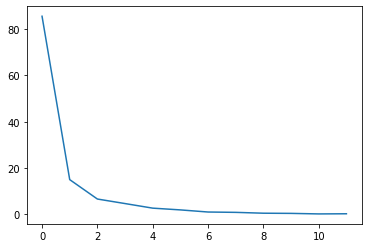

In [8]:

cov = deviation.T @ deviation / 127
eigval, eigvec = np.linalg.eig(cov)
xx = list(range(12))
plt.plot(xx, eigval)
plt.show()

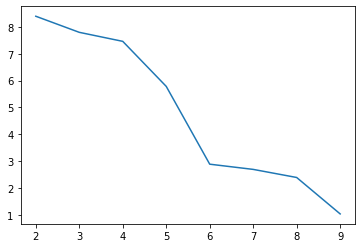

In [9]:
norms = []
for k in range(2, 10):
    mined = taste_matrix @ eigvec[:, 0:k]
    norms.append(np.mean(np.linalg.norm(mined @ eigvec[:, 0:k].T - taste_matrix, axis=1)))
plt.plot(list(range(2,10)), norms)
plt.show()


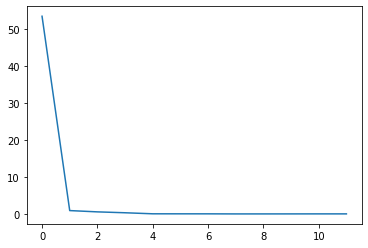

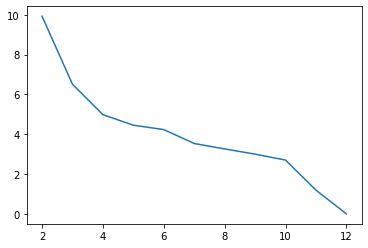

In [10]:
stdedmean = np.ones((1, 127), dtype=float) @ stded / 127
stdeddeviation = stded - mean
stdedcov = stdeddeviation.T @ stdeddeviation / 127
stdedeigval, stdedeigvec = np.linalg.eig(stdedcov)
xx = list(range(12))
plt.plot(xx, stdedeigval)
plt.show()

stdednorms = []
for k in range(2, 13):
    projected = stded @ stdedeigvec[:, 0:k]
    stdednorms.append(np.mean(np.linalg.norm(projected @ stdedeigvec[:, 0:k].T * varVec - taste_matrix, axis=1)))
plt.plot(list(range(2,13)), stdednorms)
plt.show()

In [11]:
eigvecs = stdedeigvec[:, 0:4].T * varVec
feature_name = [x[1] for x, v in sool_data[0]['taste'].items()]

for i in range(4):
    print(f'feature {i}')
    print(feature_name[0:6])
    print(eigvecs[i, 0:6])
    print(feature_name[6:13])
    print(eigvecs[i, 6:13])

feature 0
['sweet', 'weight', 'carbonic', 'plain', 'acidity', 'body']
[-4.66601384  0.15765666 -0.28274774 -2.02128948 -3.41803995 -4.50451856]
['tannin', 'nutty', 'richness', 'spicy', 'bitter', 'flavor']
[ 0.0240878  -2.77817885 -3.12363452 -4.57094833 -0.60078937 -6.45582446]
feature 1
['sweet', 'weight', 'carbonic', 'plain', 'acidity', 'body']
[-2.28209992 -0.07083711 -2.07724951 -0.04769572 -2.34904052  0.00846783]
['tannin', 'nutty', 'richness', 'spicy', 'bitter', 'flavor']
[-1.1427573   1.14029014  1.17391153  1.22181777  0.18555442  1.18693344]
feature 2
['sweet', 'weight', 'carbonic', 'plain', 'acidity', 'body']
[ 5.15485254  1.51477228  1.2038078   4.49431559  4.31957475 -1.11966442]
['tannin', 'nutty', 'richness', 'spicy', 'bitter', 'flavor']
[-0.32882608 -2.7363297  -2.78182603 -3.02954743  2.39562678 -3.0232691 ]
feature 3
['sweet', 'weight', 'carbonic', 'plain', 'acidity', 'body']
[-0.12618274  2.94871577  3.081442   -0.6796414  -0.30227721 -1.51286018]
['tannin', 'nutty',

# Reduce demension by Autoencoder

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision.utils import save_image

import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Define Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(12, 12)
        self.fc2 = nn.Linear(12, 8)
        self.fc3 = nn.Linear(8, 4)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        z = F.relu(self.fc3(x))
        return z

# Define Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 12)
        self.fc3 = nn.Linear(12, 12)
    def forward(self, z):
        z = F.relu(self.fc1(z))
        z = F.relu(self.fc2(z))
        x = F.sigmoid(self.fc3(z)) * 10  # to make output's pixels are 0~1
        return x

In [58]:
lr = 0.15
batch_size = 100
epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
enc = Encoder().to(device)
dec = Decoder().to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(list(enc.parameters()) + list(dec.parameters()), lr=lr)

In [60]:
train_set = torch.tensor(taste_matrix[0:100, :]).float().to(device)
test_set = torch.tensor(taste_matrix[100:, :]).float().to(device)

0th epoch starting.
10th epoch starting.
20th epoch starting.
30th epoch starting.
40th epoch starting.


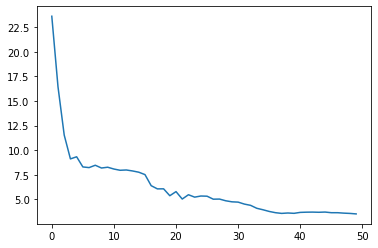

In [61]:
train_loss_list = []
for epoch in range(epochs) :
    if epoch % 10 == 0:
        print(f"{epoch}th epoch starting.")
    enc.train()
    dec.train()
    z = enc(train_set)
    r = dec(z)
        
    optimizer.zero_grad()
    train_loss = loss_function(train_set, r)
    train_loss.backward()
    train_loss_list.append(train_loss.item())

    optimizer.step()

plt.plot(list(range(epochs)), train_loss_list)
plt.show()

In [69]:
enc.eval()
dec.eval()

for i in range(5):
    print(f"origin : {train_set[i]}")
    a = dec(enc(train_set[i]))
    print(f"autoencoder: {a}")
    d = train_set[i] - a
    print(f"difference : {d}")
    print(f"difference abs: {torch.linalg.norm(d, 1) / 12}")
    

origin : tensor([ 8., -1., -1.,  4.,  4.,  6., -1., -1., -1., -1.,  2., -1.],
       device='cuda:0')
autoencoder: tensor([5.8128, 0.0108, 0.0095, 4.9142, 5.3454, 3.7059, 0.0097, 0.0478, 0.1441,
        0.0359, 0.0260, 0.0580], device='cuda:0', grad_fn=<MulBackward0>)
difference : tensor([ 2.1872, -1.0108, -1.0095, -0.9142, -1.3454,  2.2941, -1.0097, -1.0478,
        -1.1441, -1.0359,  1.9740, -1.0580], device='cuda:0',
       grad_fn=<SubBackward0>)
difference abs: 1.335886001586914
origin : tensor([-1., -1., -1., -1., -1.,  4., -1.,  2.,  8.,  4., -1.,  7.],
       device='cuda:0')
autoencoder: tensor([1.6464e-01, 1.1957e-02, 1.1651e-02, 7.2367e-02, 1.8350e-01, 7.4970e+00,
        5.6367e-03, 3.7863e+00, 4.6632e+00, 5.3093e+00, 8.1944e-03, 5.9289e+00],
       device='cuda:0', grad_fn=<MulBackward0>)
difference : tensor([-1.1646, -1.0120, -1.0117, -1.0724, -1.1835, -3.4970, -1.0056, -1.7863,
         3.3368, -1.3093, -1.0082,  1.0711], device='cuda:0',
       grad_fn=<SubBackward0>)
d

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM 

tokenizer = AutoTokenizer.from_pretrained(
  'kakaobrain/kogpt', revision='KoGPT6B-ryan1.5b-float16',  # or float32 version: revision=KoGPT6B-ryan1.5b
  bos_token='[BOS]', eos_token='[EOS]', unk_token='[UNK]', pad_token='[PAD]', mask_token='[MASK]'
)
model = AutoModelForCausalLM.from_pretrained(
  'kakaobrain/kogpt', revision='KoGPT6B-ryan1.5b-float16',  # or float32 version: revision=KoGPT6B-ryan1.5b
  pad_token_id=tokenizer.eos_token_id,
  torch_dtype='auto', low_cpu_mem_usage=True, output_hidden_states = True
).to(device='cuda', non_blocking=True)
_ = model.eval()

In [18]:
prompt = '오늘 미세먼지'
with torch.no_grad():
  tokens = tokenizer.encode(prompt, return_tensors='pt').to(device='cuda', non_blocking=True)
  gen_tokens = model.generate(tokens, do_sample=True, temperature=0.5, max_length=64)
  generated = tokenizer.batch_decode(gen_tokens)[0]
  
print(generated)

오늘 미세먼지 농도가 '좋음'을 기록하고 있어서 기분이 좋네요. ​ 오늘은 날씨가 참 좋네요. ​ 오늘은 날씨가 좋아서 그런지 기분이 더 좋은 하루입니다. ​ ​ ​ ​ 오늘은 날씨가 좋아서 그런지 기분이 더 좋은 하루입니다. ​ ​


In [34]:
prompt = '숙제 하기 싫고, 공부하기 싫고, 놀고 싶은데'
with torch.no_grad():
  tokens = tokenizer.encode(prompt, return_tensors='pt').to(device='cuda', non_blocking=True)
  res = model(tokens)

In [5]:
import nlp

li = nlp.LangToVec()

In [6]:
with open('sool_data.p', 'rb') as file: 
    sool_data = pickle.load(file)

taste_list = []
for i in sool_data:
    taste_list.append([x for _, x in i['taste'].items()])
taste_matrix = torch.tensor(taste_list).float()

x = li.infer("달콤한 술")



In [12]:
torch.argmax(taste_matrix @ x).item()

92